In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import rc, rcParams

In [15]:
# w = wanted traffic, nw = non wanted traffic, c = clients

# udp / dns : packets per second
# tcp : connections per second

dns_w50k_nw1000k_c254 = pd.read_csv('dns_w50k_nw1000k_c254.csv',sep=';')
dns_w50k_nw5000k_c254 = pd.read_csv('dns_w50k_nw5000k_c254.csv',sep=';')
dns_w50k_nw1000k_c50 = pd.read_csv('dns_w50k_nw1000k_c50.csv',sep=';')
dns_w50k_nw5000k_c50 = pd.read_csv('dns_w50k_nw5000k_c50.csv',sep=';')

http_w50k_nw100k = pd.read_csv('tcp_w50k_nw100k.csv',sep=';')
http_w50k_nw1000k = pd.read_csv('tcp_w50k_nw1000k.csv',sep=';')
http_w1000k_nw1000k = pd.read_csv('tcp_w1000k_nw1000k.csv',sep=';')

udp_w10k_nw50k_c254 = pd.read_csv('udp_w10k_nw50k_c254.csv',sep=';')
udp_w10k_nw50k_c50 = pd.read_csv('udp_w10k_nw50k_c50.csv',sep=';')

udp_new_w100k_nw10000k_c508 = pd.read_csv('udp_new_w100k_nw10000k_c254.csv',sep=';')

dns_drop_w50k_nw1000k_c254 = dns_w50k_nw1000k_c254[dns_w50k_nw1000k_c254['XDP_action'] == 'XDP_DROP']
dns_pass_w50k_nw1000k_c254 = dns_w50k_nw1000k_c254[dns_w50k_nw1000k_c254['XDP_action'] == 'XDP_PASS']
dns_drop_w50k_nw5000k_c254 = dns_w50k_nw5000k_c254[dns_w50k_nw5000k_c254['XDP_action'] == 'XDP_DROP']
dns_pass_w50k_nw5000k_c254 = dns_w50k_nw5000k_c254[dns_w50k_nw5000k_c254['XDP_action'] == 'XDP_PASS']
dns_drop_w50k_nw1000k_c50 = dns_w50k_nw1000k_c50[dns_w50k_nw1000k_c50['XDP_action'] == 'XDP_DROP']
dns_pass_w50k_nw1000k_c50 = dns_w50k_nw1000k_c50[dns_w50k_nw1000k_c50['XDP_action'] == 'XDP_PASS']
dns_drop_w50k_nw5000k_c50 = dns_w50k_nw5000k_c50[dns_w50k_nw5000k_c50['XDP_action'] == 'XDP_DROP']
dns_pass_w50k_nw5000k_c50 = dns_w50k_nw5000k_c50[dns_w50k_nw5000k_c50['XDP_action'] == 'XDP_PASS']

http_drop_w50k_nw100k = http_w50k_nw100k[http_w50k_nw100k['XDP_action'] == 'XDP_DROP']
http_pass_w50k_nw100k = http_w50k_nw100k[http_w50k_nw100k['XDP_action'] == 'XDP_PASS']
http_drop_w50k_nw1000k = http_w50k_nw1000k[http_w50k_nw1000k['XDP_action'] == 'XDP_DROP']
http_pass_w50k_nw1000k = http_w50k_nw1000k[http_w50k_nw1000k['XDP_action'] == 'XDP_PASS']
http_drop_w1000k_nw1000k = http_w1000k_nw1000k[http_w1000k_nw1000k['XDP_action'] == 'XDP_DROP']
http_pass_w1000k_nw1000k = http_w1000k_nw1000k[http_w1000k_nw1000k['XDP_action'] == 'XDP_PASS']

udp_drop_w10k_nw50k_c254 = udp_w10k_nw50k_c254[udp_w10k_nw50k_c254['XDP_action'] == 'XDP_DROP']
udp_pass_w10k_nw50k_c254 = udp_w10k_nw50k_c254[udp_w10k_nw50k_c254['XDP_action'] == 'XDP_PASS']
udp_drop_w10k_nw50k_c50 = udp_w10k_nw50k_c50[udp_w10k_nw50k_c50['XDP_action'] == 'XDP_DROP']
udp_pass_w10k_nw50k_c50 = udp_w10k_nw50k_c50[udp_w10k_nw50k_c50['XDP_action'] == 'XDP_PASS']

udp_new_drop_w100k_nw10000k_c508 = udp_new_w100k_nw10000k_c508[udp_new_w100k_nw10000k_c508['XDP_action'] == 'XDP_DROP']
udp_new_pass_w100k_nw10000k_c508  = udp_new_w100k_nw10000k_c508[udp_new_w100k_nw10000k_c508['XDP_action'] == 'XDP_PASS']

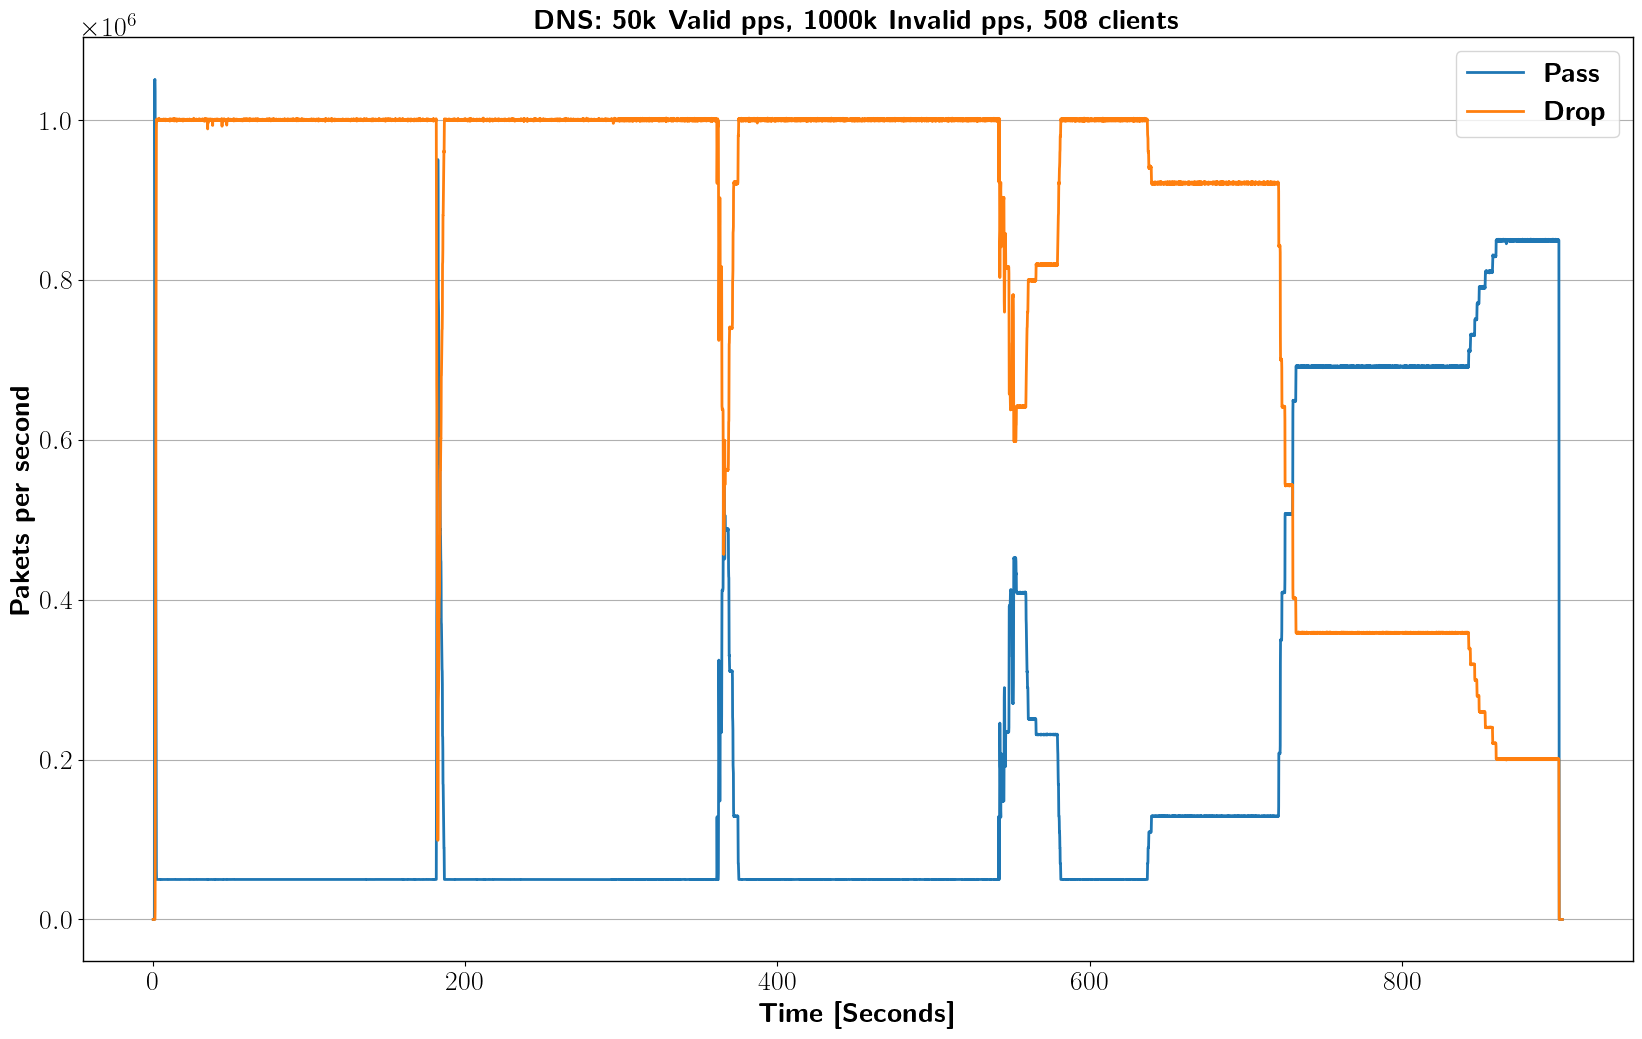

In [5]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(dns_pass_w50k_nw1000k_c254['time'],dns_pass_w50k_nw1000k_c254['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(dns_pass_w50k_nw1000k_c254['time'],dns_drop_w50k_nw1000k_c254['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{DNS: 50k Valid pps, 1000k Invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('dns_w50k_nw1000k_c254.png')
plt.show()

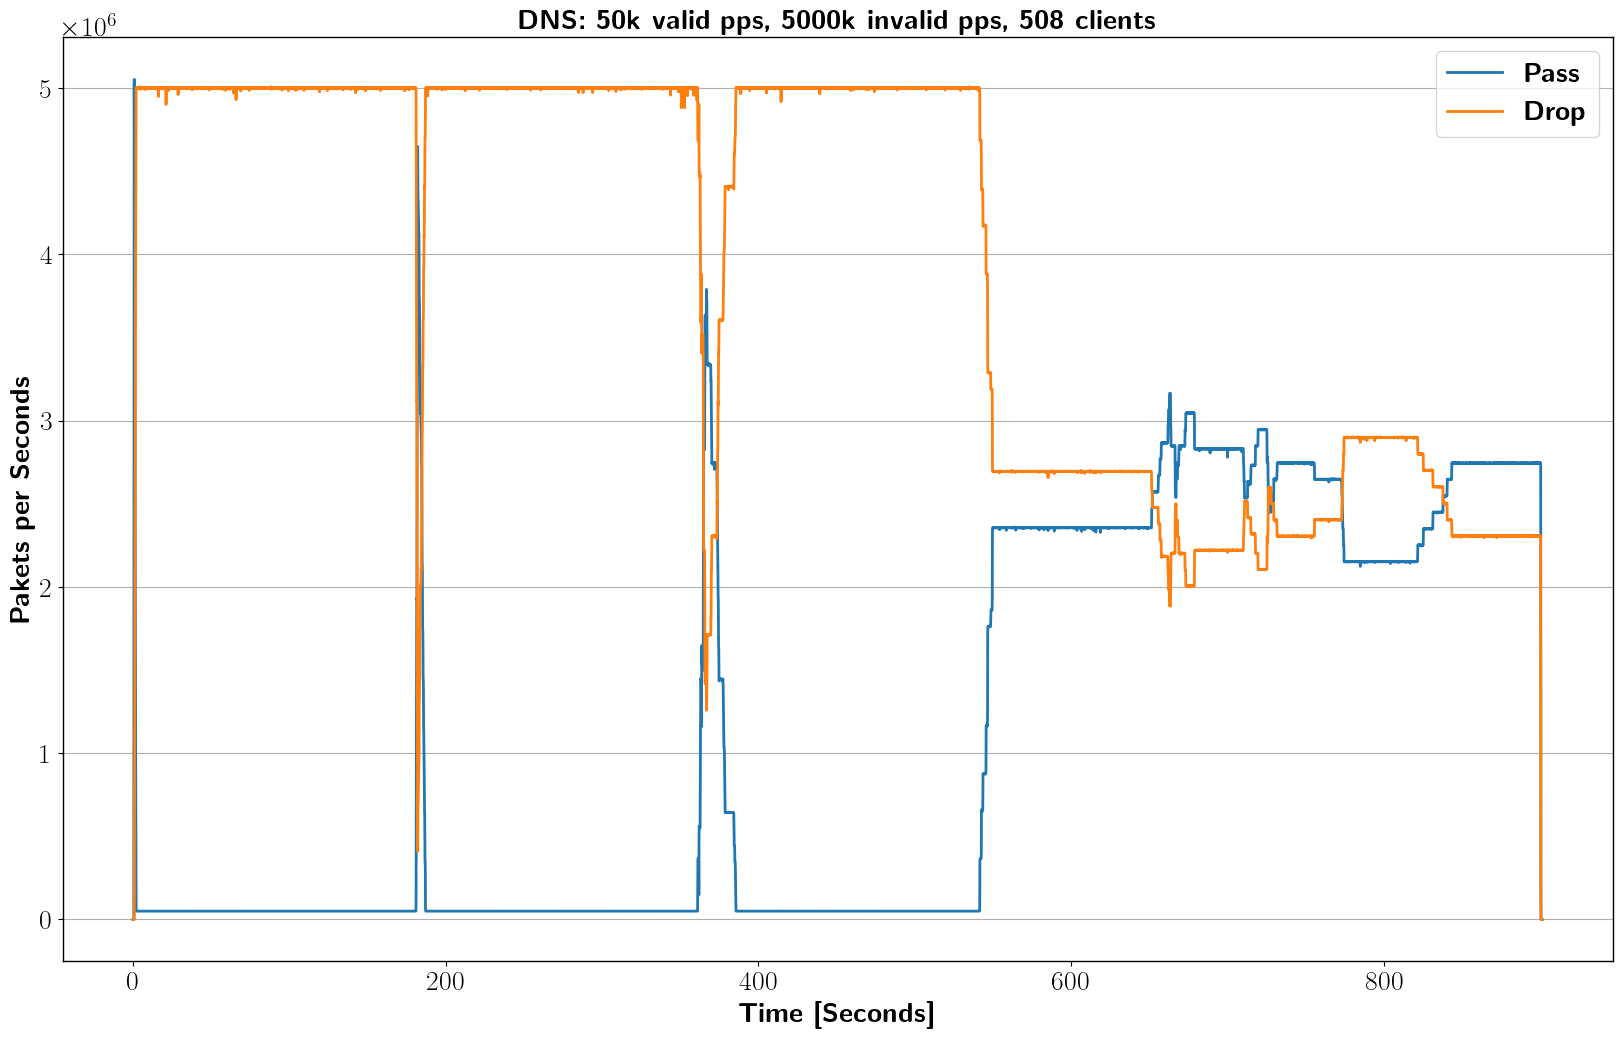

In [6]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(dns_pass_w50k_nw5000k_c254['time'],dns_pass_w50k_nw5000k_c254['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(dns_pass_w50k_nw5000k_c254['time'],dns_drop_w50k_nw5000k_c254['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Seconds}',fontsize=f_size)
plt.title(r'\textbf{DNS: 50k valid pps, 5000k invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('dns_w50k_nw5000k_c254.png')
plt.show()


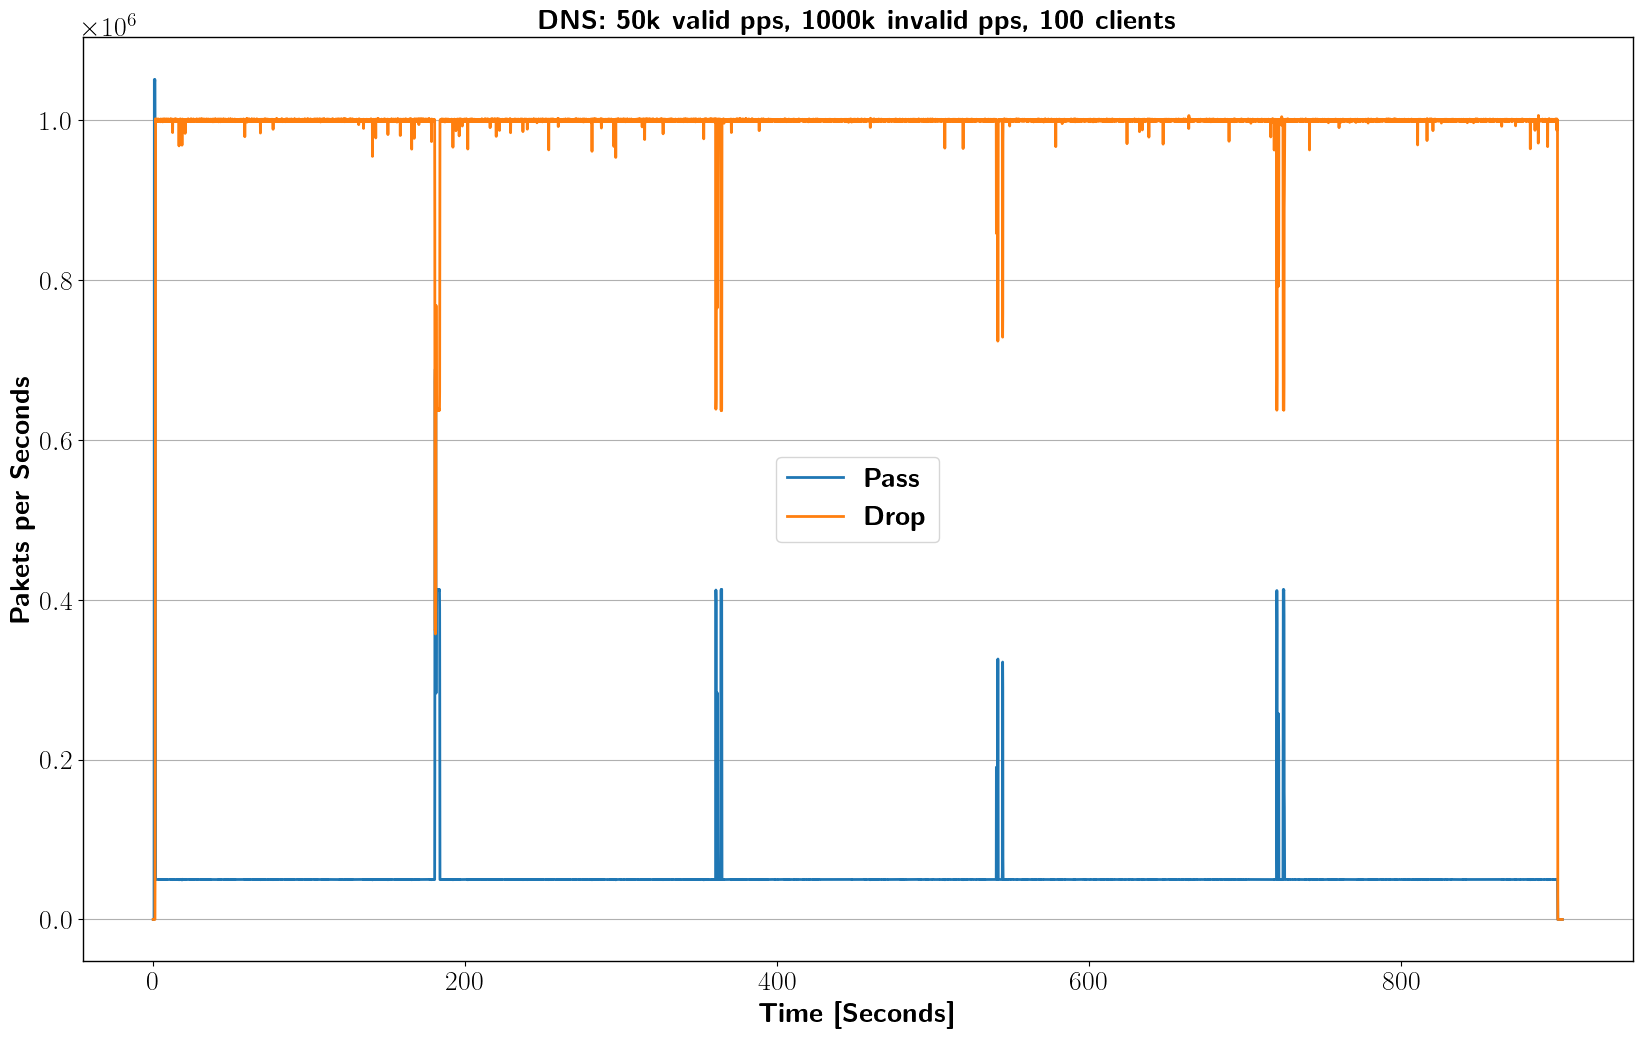

In [7]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(dns_pass_w50k_nw1000k_c50['time'],dns_pass_w50k_nw1000k_c50['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(dns_pass_w50k_nw1000k_c50['time'],dns_drop_w50k_nw1000k_c50['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Seconds}',fontsize=f_size)
plt.title(r'\textbf{DNS: 50k valid pps, 1000k invalid pps, 100 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('dns_w50k_nw1000k_c50.png')
plt.show()

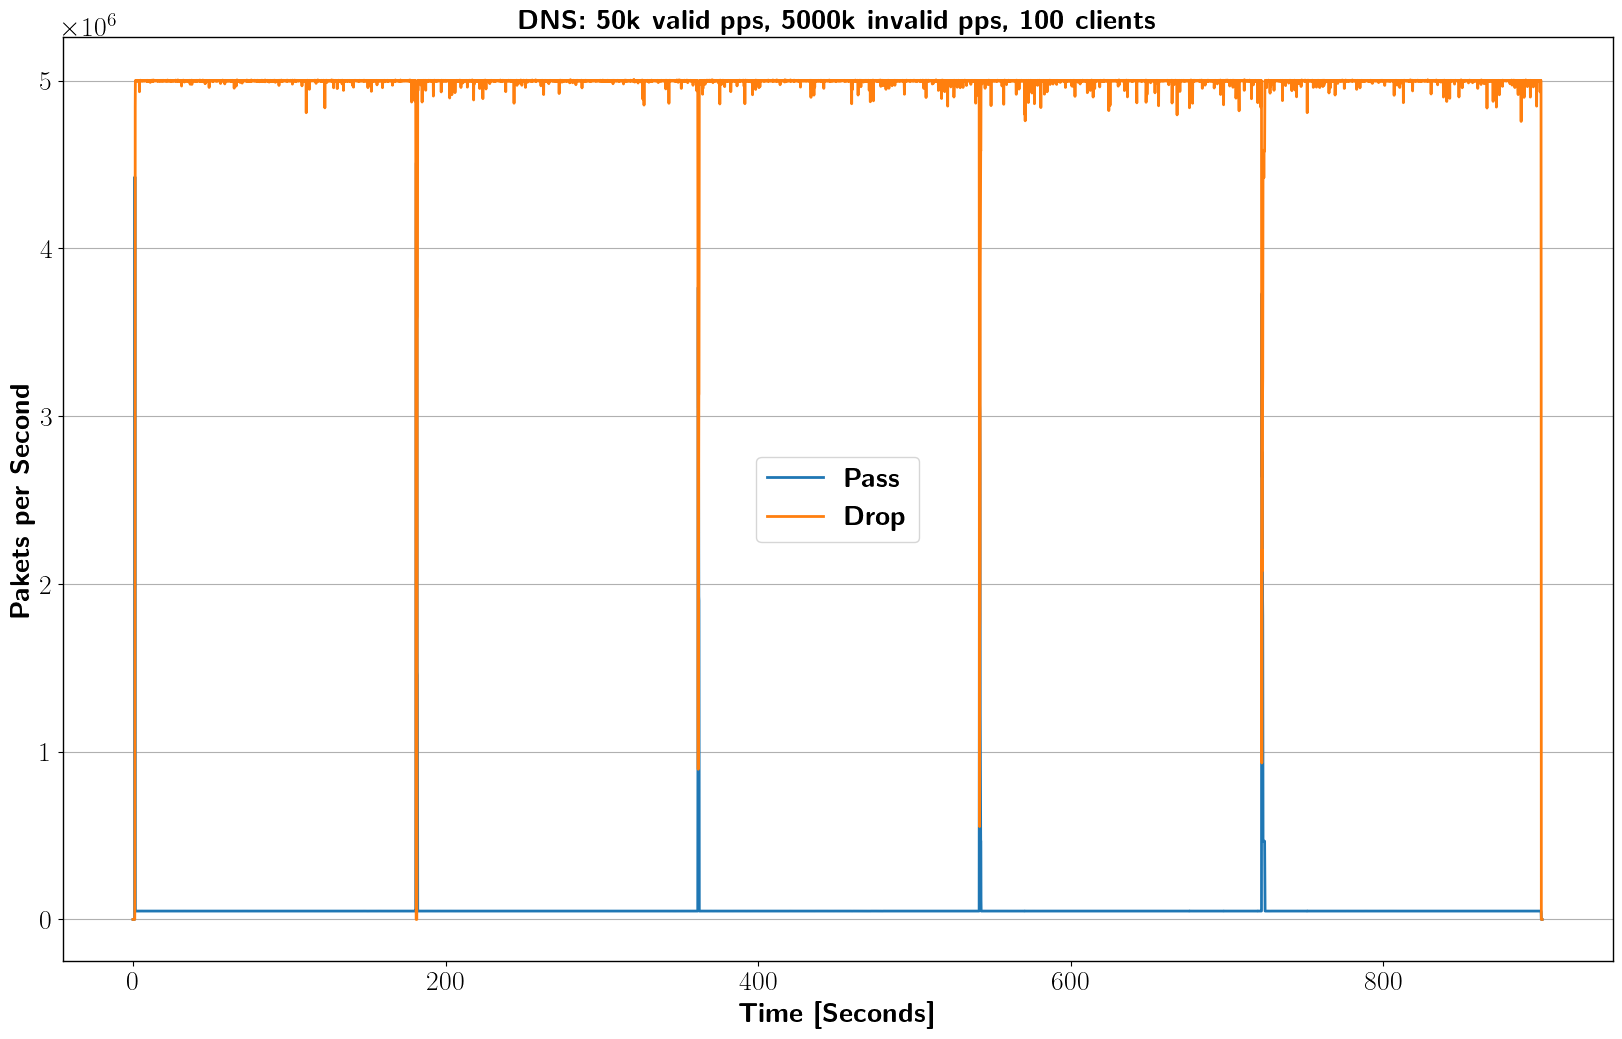

In [8]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(dns_pass_w50k_nw5000k_c50['time'],dns_pass_w50k_nw5000k_c50['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(dns_pass_w50k_nw5000k_c50['time'],dns_drop_w50k_nw5000k_c50['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{DNS: 50k valid pps, 5000k invalid pps, 100 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('dns_w50k_nw5000k_c50.png')
plt.show()

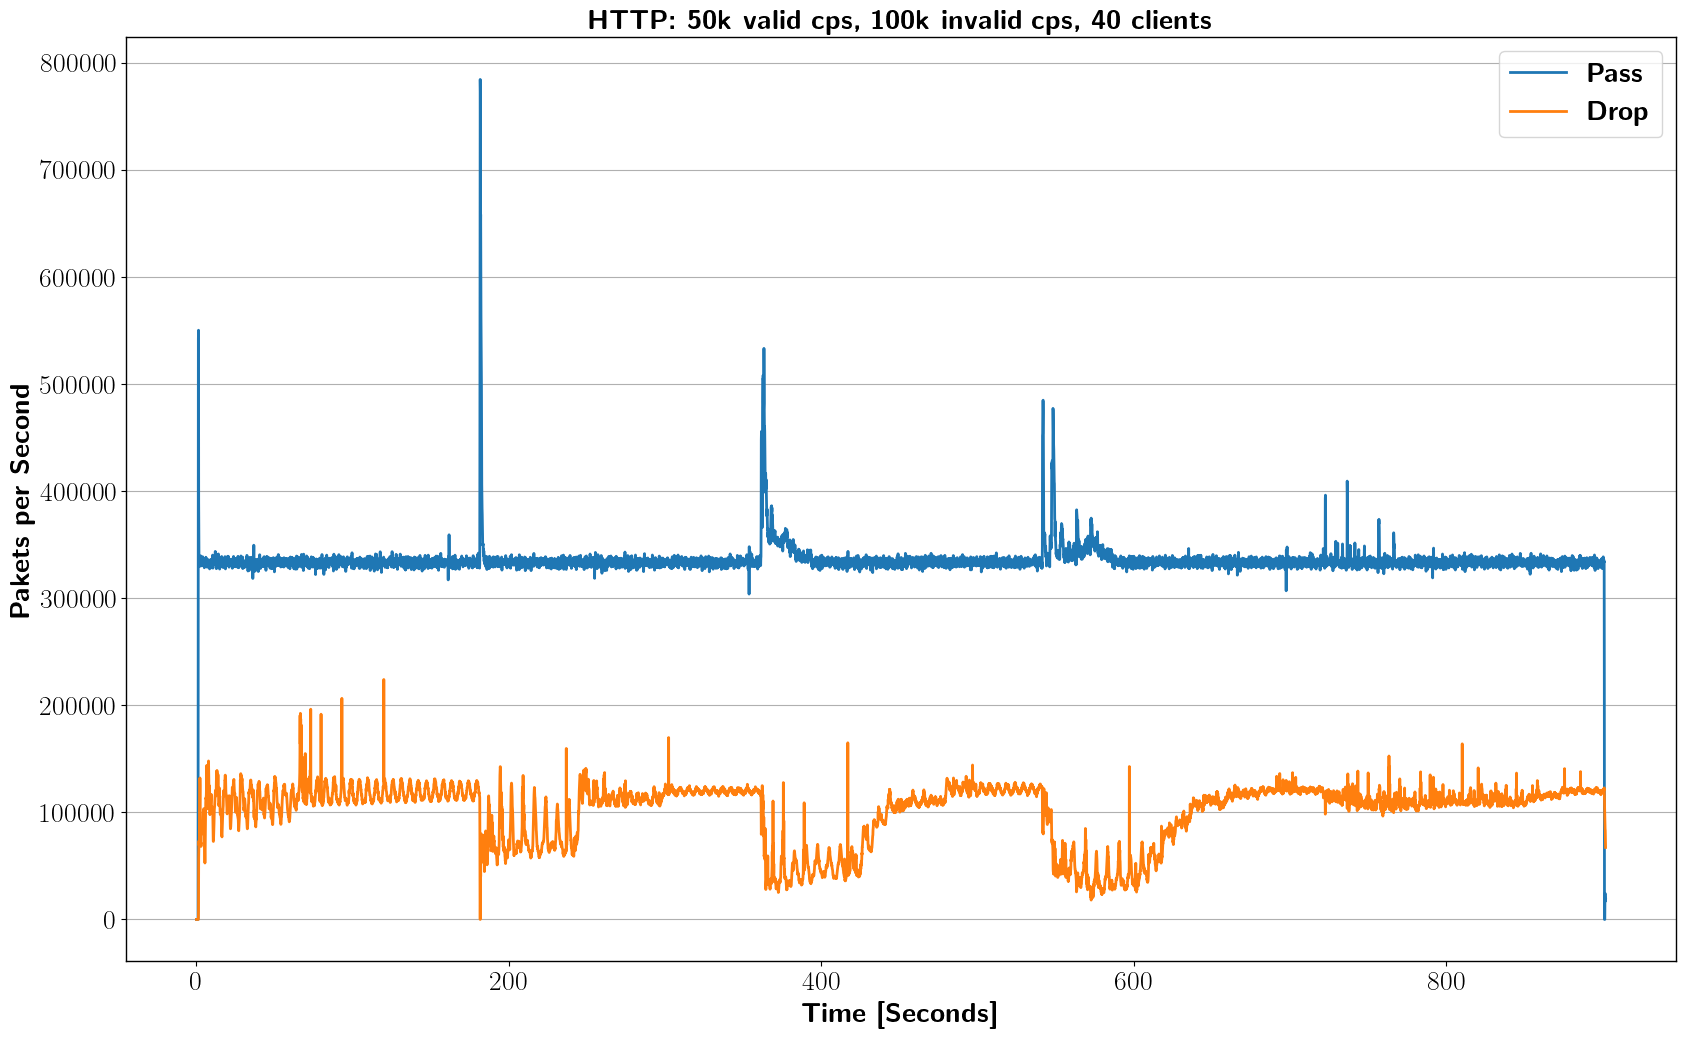

In [9]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(http_pass_w50k_nw100k['time'],http_pass_w50k_nw100k['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(http_pass_w50k_nw100k['time'],http_drop_w50k_nw100k['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{HTTP: 50k valid cps, 100k invalid cps, 40 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('http_w50k_nw100k.png')
plt.show()

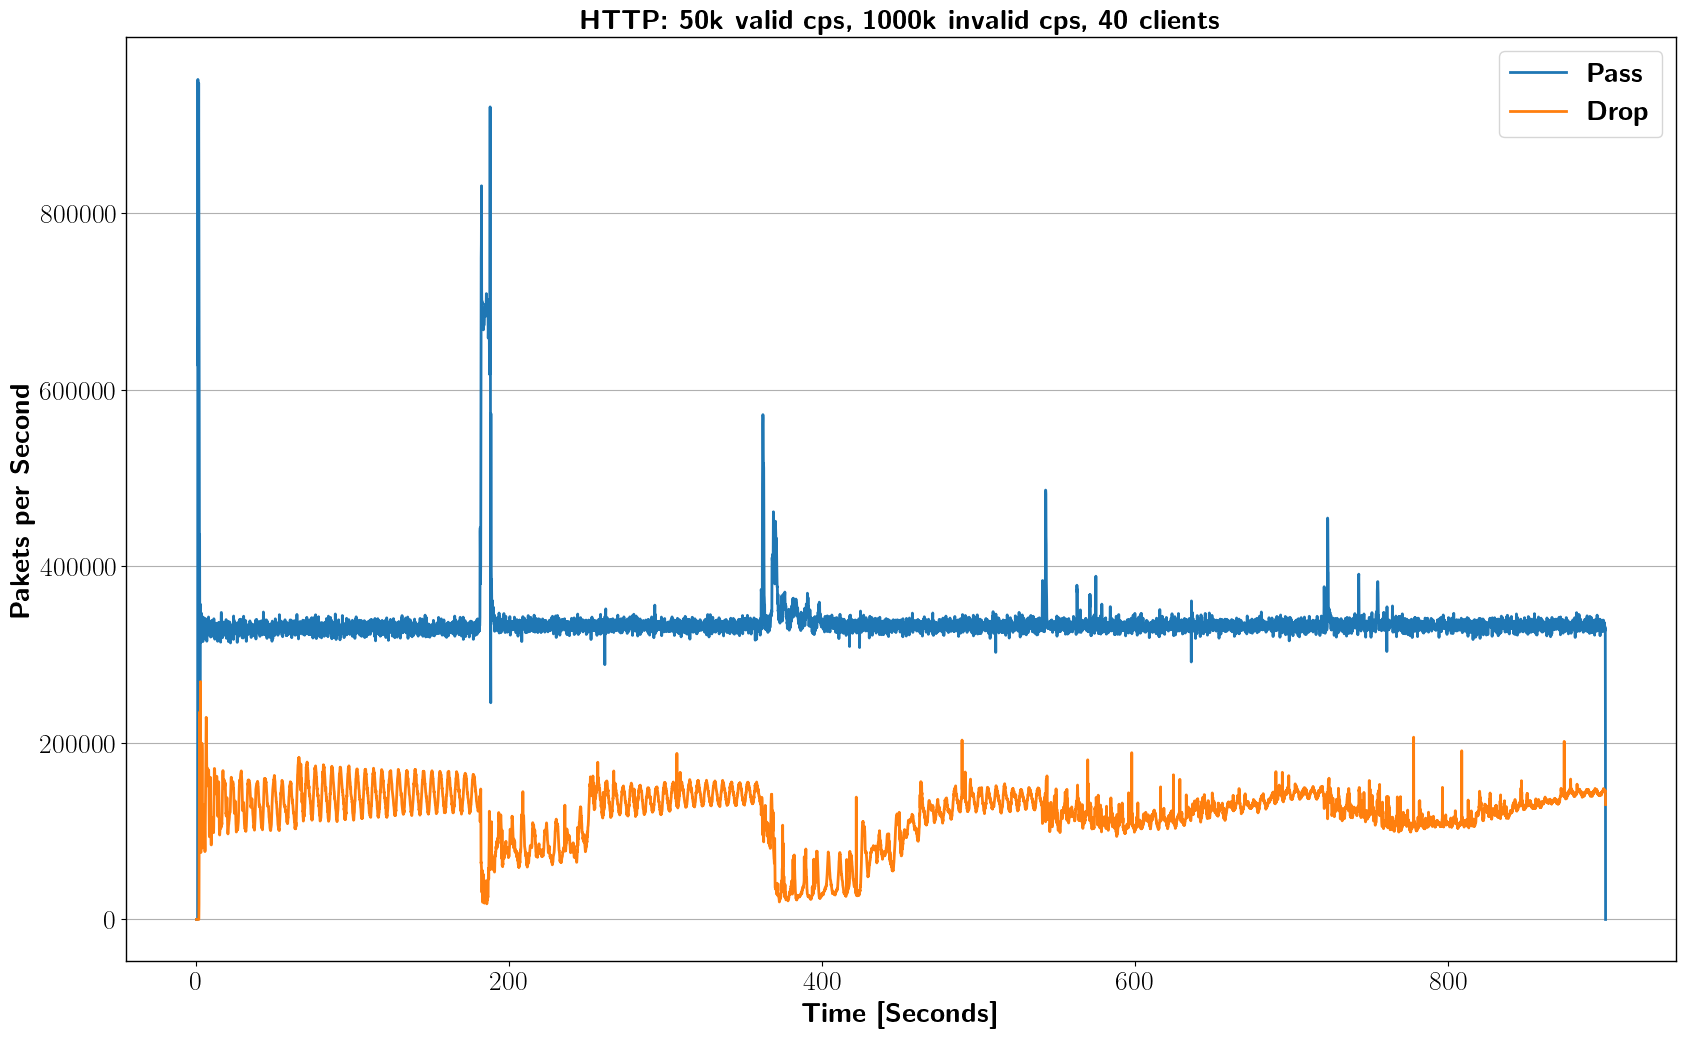

In [10]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(http_pass_w50k_nw1000k['time'],http_pass_w50k_nw1000k['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(http_pass_w50k_nw1000k['time'],http_drop_w50k_nw1000k['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{HTTP: 50k valid cps, 1000k invalid cps, 40 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('http_w50k_nw1000k.png')
plt.show()

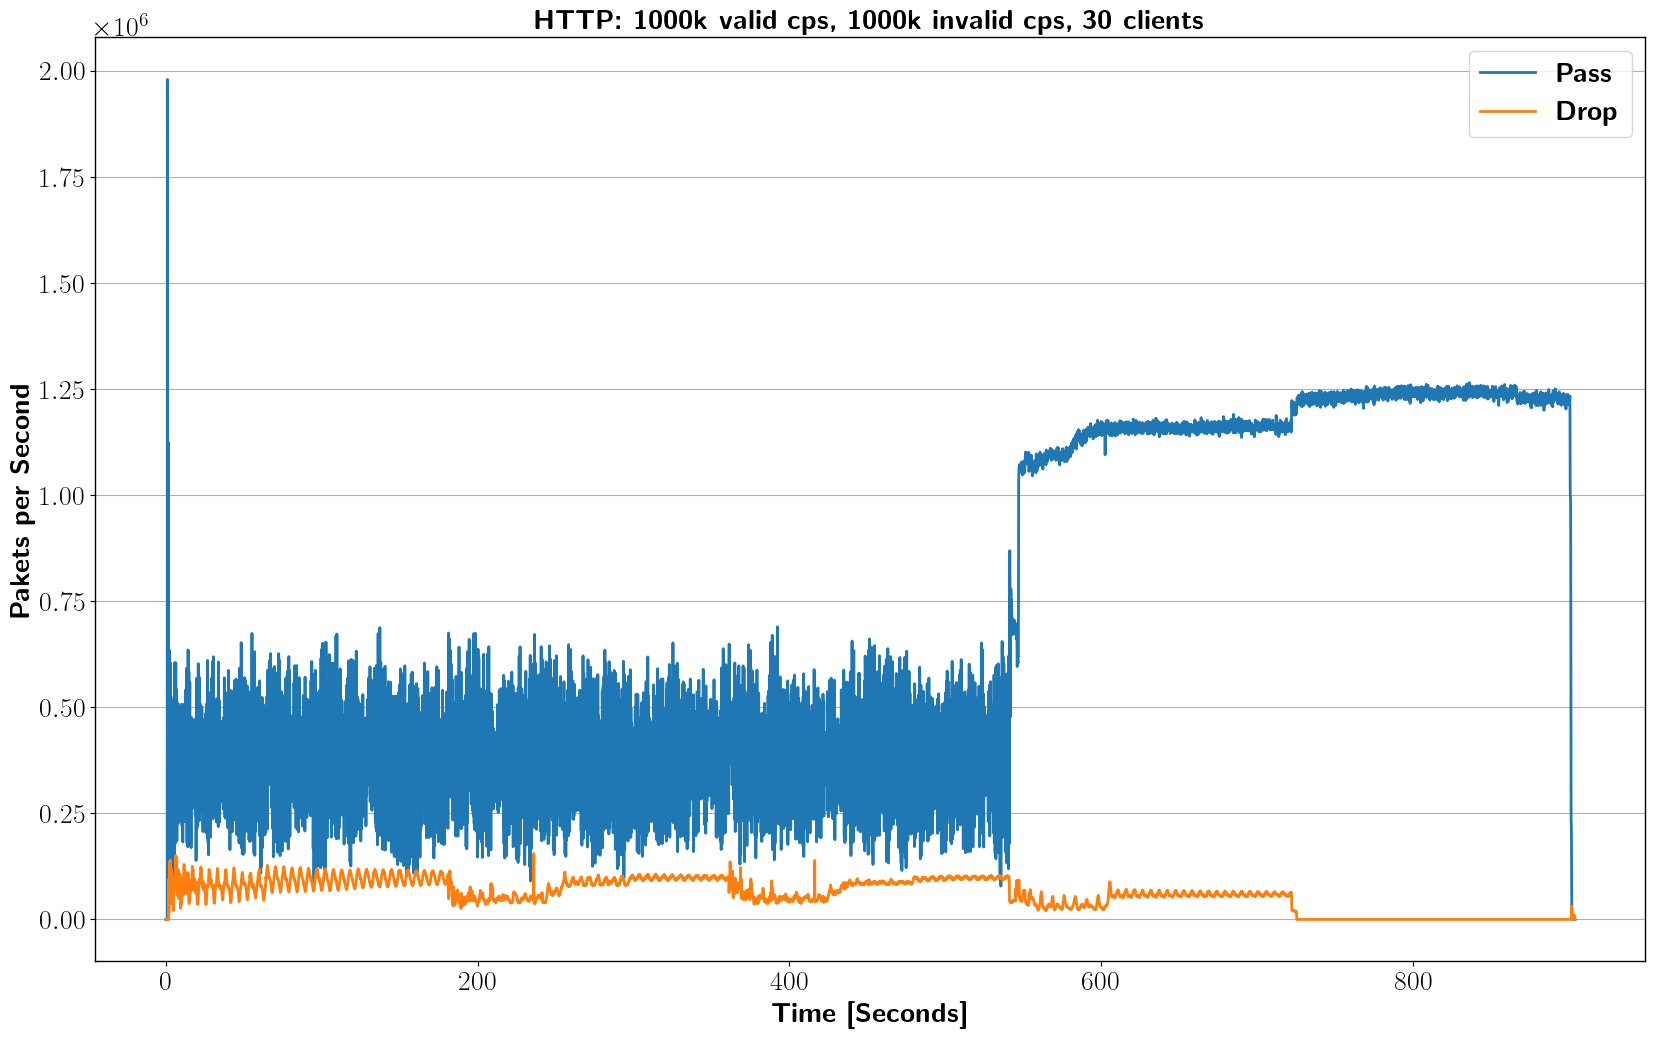

In [11]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(http_pass_w1000k_nw1000k['time'],http_pass_w1000k_nw1000k['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(http_pass_w1000k_nw1000k['time'],http_drop_w1000k_nw1000k['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{HTTP: 1000k valid cps, 1000k invalid cps, 30 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('http_w1000k_nw1000k.png')
plt.show()

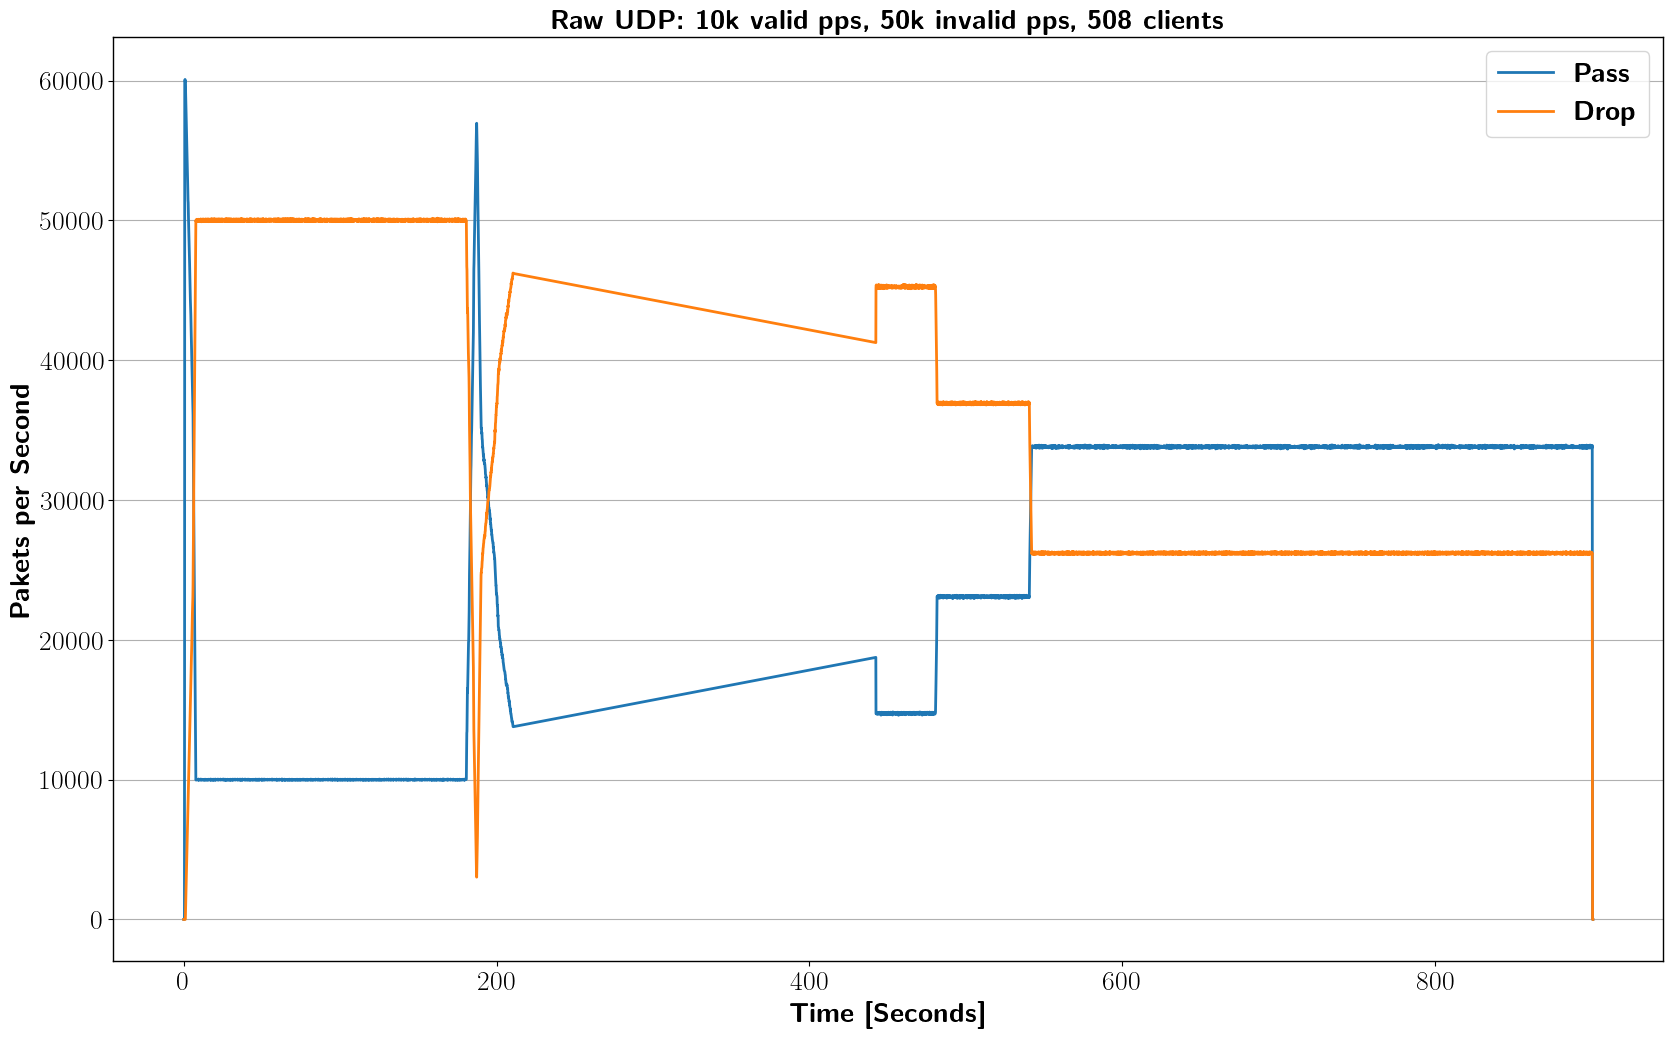

In [12]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(udp_pass_w10k_nw50k_c254['time'],udp_pass_w10k_nw50k_c254['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(udp_pass_w10k_nw50k_c254['time'],udp_drop_w10k_nw50k_c254['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{Raw UDP: 10k valid pps, 50k invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('udp_w10k_nw50k_c254.png')
plt.show()

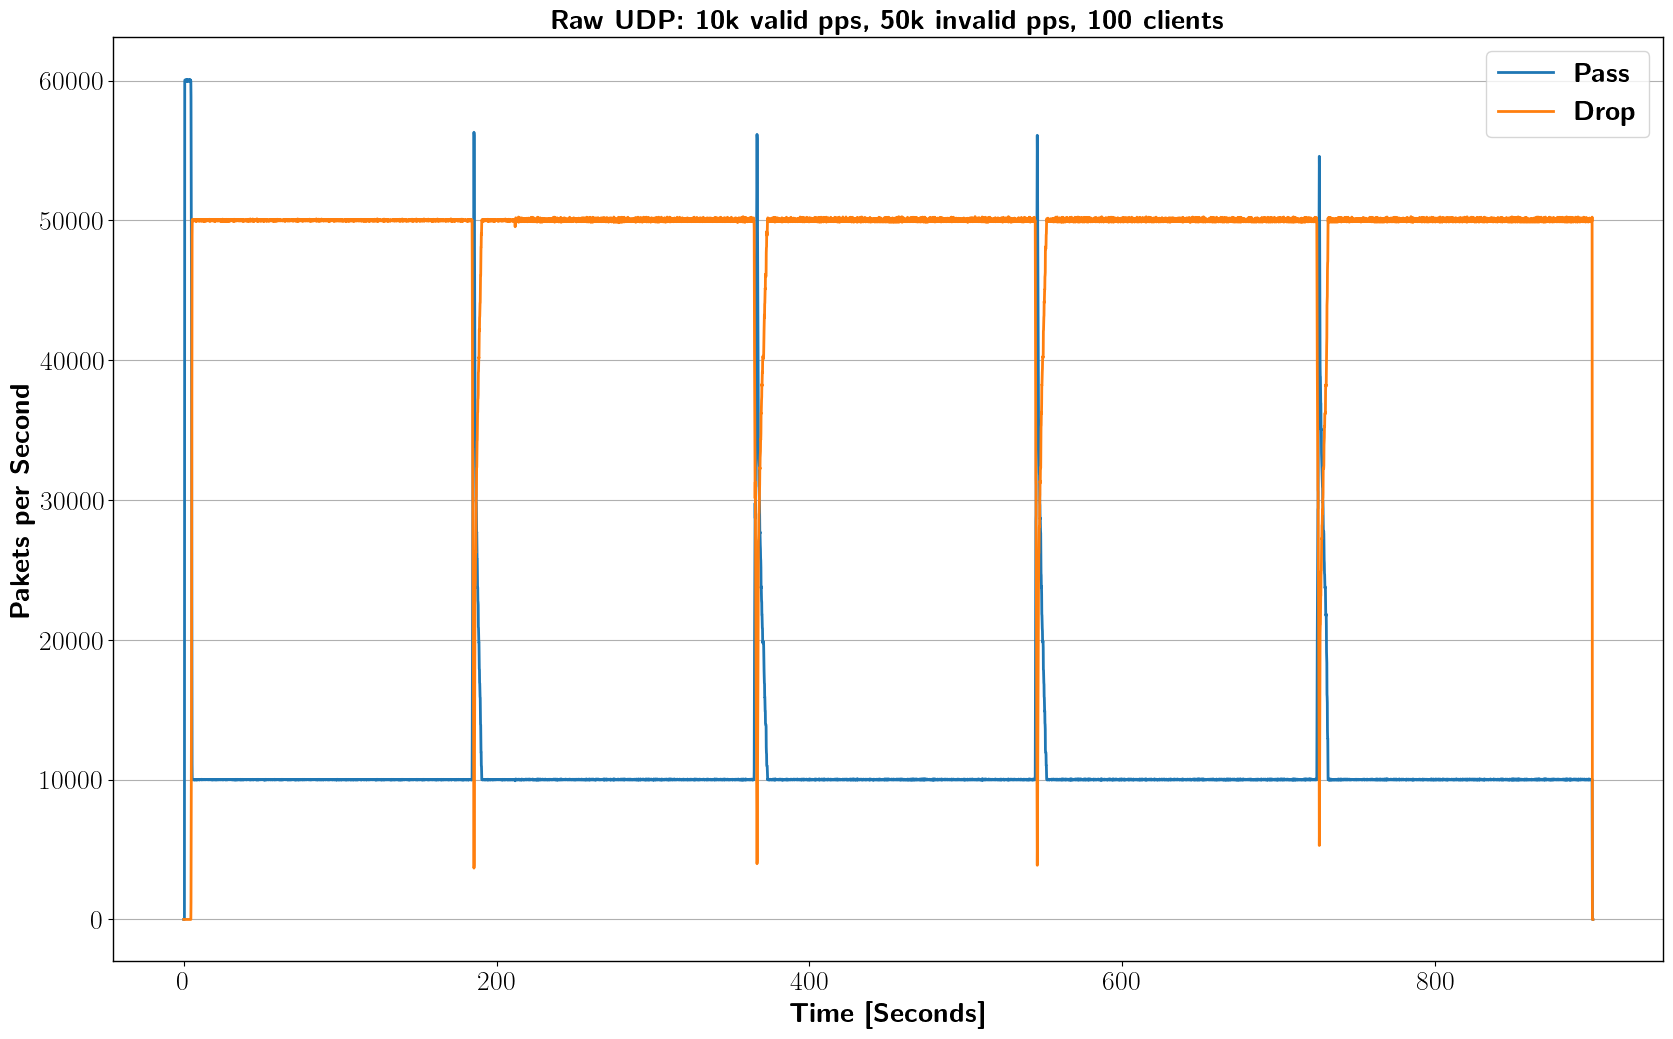

In [13]:
fig = plt.figure()experiments/
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

plt.plot(udp_pass_w10k_nw50k_c50['time'],udp_pass_w10k_nw50k_c50['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(udp_pass_w10k_nw50k_c50['time'],udp_drop_w10k_nw50k_c50['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{Raw UDP: 10k valid pps, 50k invalid pps, 100 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('udp_w10k_nw50k_c50.png')
plt.show()experiments/

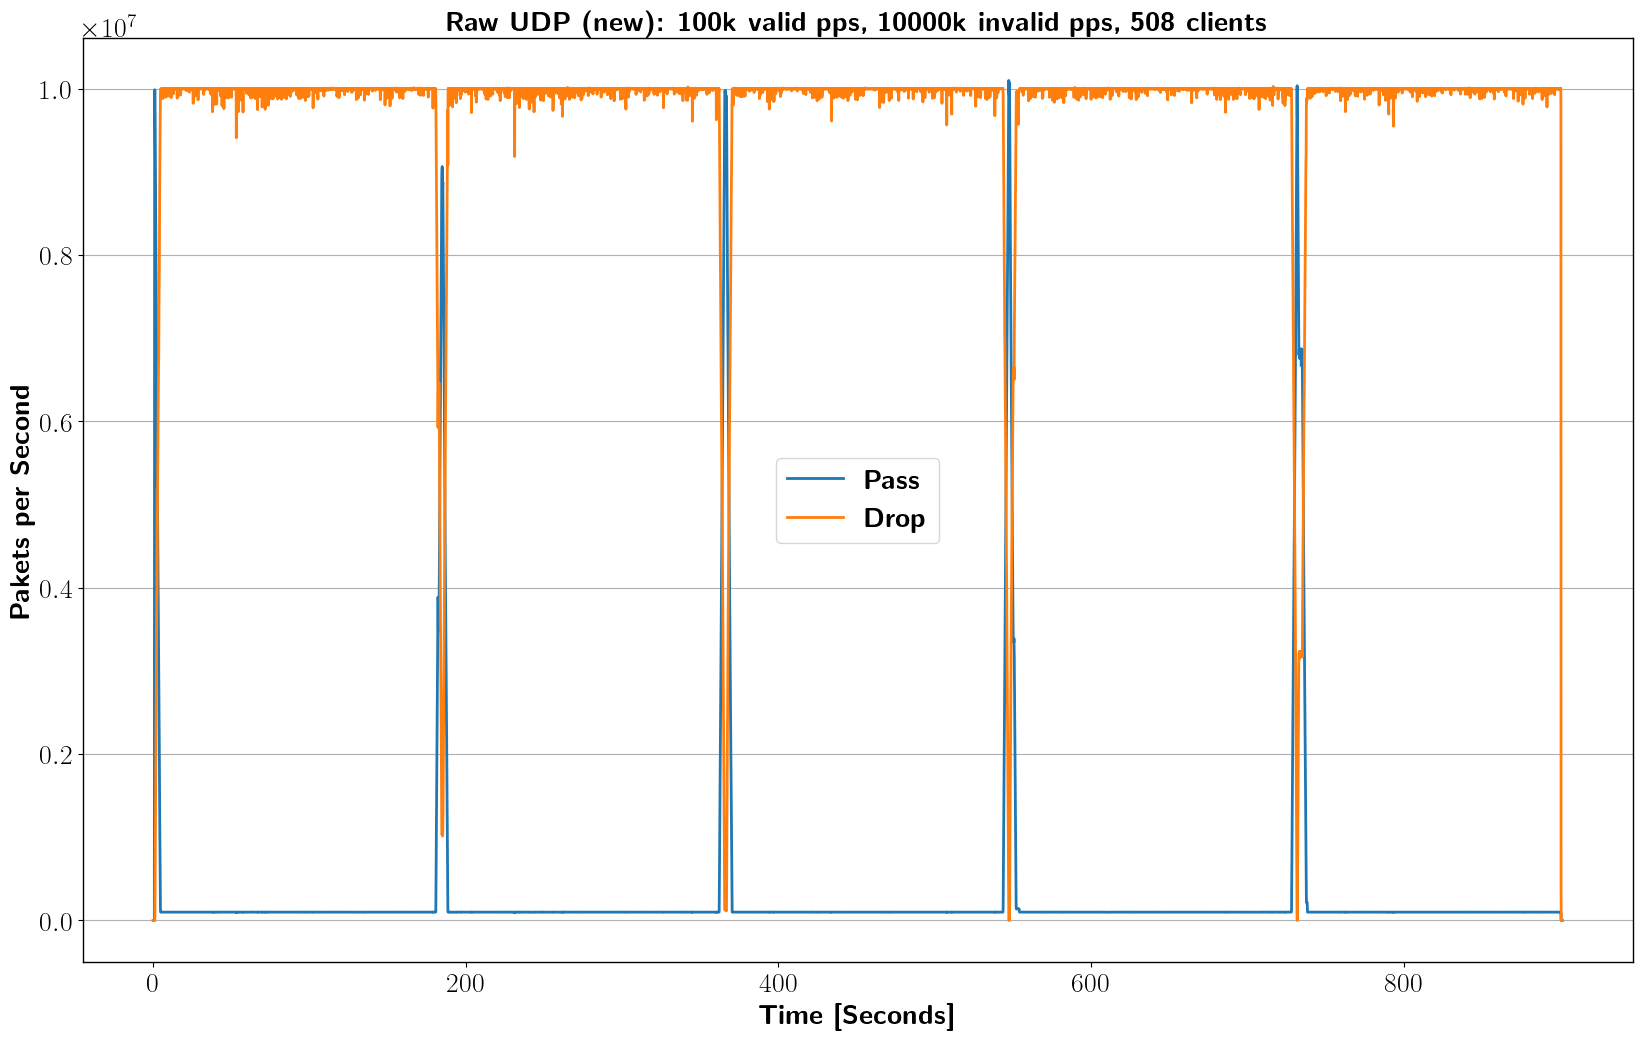

In [16]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size)

udp_new_w100k_nw10000k_c508

plt.plot(udp_new_pass_w100k_nw10000k_c508['time'],udp_new_pass_w100k_nw10000k_c508['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(udp_new_pass_w100k_nw10000k_c508['time'],udp_new_drop_w100k_nw10000k_c508['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per Second}',fontsize=f_size)
plt.title(r'\textbf{Raw UDP (new): 100k valid pps, 10000k invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('udp_w10k_nw50k_c50.png')
plt.show()